# MNIST - Categorical Classification
> # Overfitting Issue
## Import Tensorflow

In [22]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow 

In [23]:
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 확인

In [24]:
tf.test.gpu_device_name()

'/device:GPU:0'

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [25]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [26]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [27]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

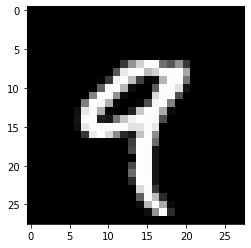

In [28]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [29]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [30]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [31]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [32]:
print(X_train[4])

[0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.
 0.          0.          0.          0.         

> ## 2) One Hot Encoding

In [33]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.initializers import HeNormal

initializer = HeNormal()

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,), kernel_initializer = initializer))
mnist.add(layers.Dense(256, activation = 'relu', kernel_initializer = initializer))
mnist.add(layers.Dense(10, activation = 'softmax', kernel_initializer = initializer))

* 모델 구조 확인

In [36]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [37]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [38]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2581 - accuracy: 0.9214 - val_loss: 0.1216 - val_accuracy: 0.9643
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9716 - val_loss: 0.0934 - val_accuracy: 0.9723
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0899 - val_accuracy: 0.9743
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0935 - val_accuracy: 0.9772
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.1002 - val_accuracy: 0.9774
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0966 - val_accuracy: 0.9803

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

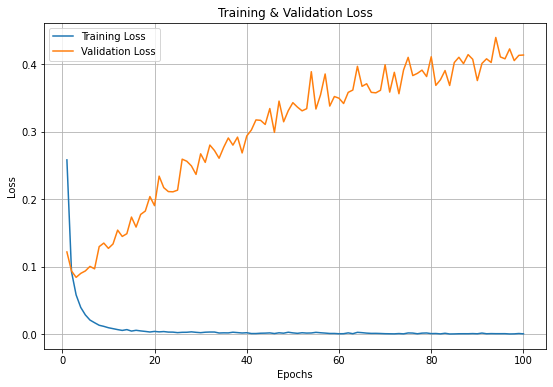

In [39]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [40]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.9827
Loss = 0.32454
Accuracy = 0.98270


> ## 6) Model Predict

* Probability

In [41]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [42]:
print(mnist.predict_classes(X_test[:1,:]))

[7]


# 
# 
# 
# The End
# 
# 
# 